# WUM 2020: Projekt II, Milestone I

### Jakub Kosterna, Zuzanna Mróz & Aleksander Podsiad

## Wstępna eksploracja

**Online Shoppers Purchasing Intention** to prawdopodobnie fascynujący zbiór danych zawierający informacje o wizytach na pewnym sklepie internetowym i ich właściwościach. Ale czy aby na pewno nazwa datasetu nie jest myląca i tak naprawdę nie chodzi w nim o coś zupełnie innego?   
Sprawdźmy to odczytując naszą ramkę!

Zbiór nie jest zbyt duży - jego *.csv* waży zaledwie 1 MB.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

In [22]:
warnings.simplefilter('ignore')

In [67]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.shape

(12330, 18)

In [4]:
random.seed(123)
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2816,0,0.0,0,0.0,15,194.066667,0.001905,0.051238,0.000000,0.0,May,2,5,4,2,Returning_Visitor,False,False
11586,0,0.0,2,75.5,109,4008.578283,0.003003,0.018998,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
1842,2,28.0,2,175.5,27,1253.333333,0.006667,0.014667,39.717300,0.0,Mar,2,2,1,2,Returning_Visitor,False,True
4096,0,0.0,0,0.0,11,1160.000000,0.000000,0.018182,20.608364,0.0,May,2,2,1,4,New_Visitor,False,True
5731,0,0.0,0,0.0,13,374.900000,0.000000,0.047619,16.725618,0.0,Aug,4,1,1,3,Returning_Visitor,False,True
11516,0,0.0,0,0.0,5,134.500000,0.040000,0.024000,0.000000,0.0,Nov,3,2,9,3,Returning_Visitor,True,False
1760,0,0.0,0,0.0,12,547.333333,0.000000,0.033333,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,False,False
8459,1,29.0,0,0.0,41,803.507738,0.000000,0.008425,0.000000,0.0,Dec,1,2,1,8,Returning_Visitor,True,False
564,0,0.0,0,0.0,80,801.802381,0.000000,0.003500,0.000000,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
6776,6,52.7,0,0.0,88,1568.533333,0.000000,0.005128,0.000000,0.0,June,2,5,1,2,Returning_Visitor,True,False


Nasz dataset składa się z 12 330 obserwacji, każda zawierająca w sobie 18 informacji. Jak możemy przeczytać w dokumentacji frame, poszczególne kolumny reprezentują kolejno:

* *Administrative*, *Informational*, *ProductRelated* - liczba stron danych kategorii (administracyjne, informacyjne, związane z produktem) odwiedzonych podczas sesji przez użytkownika, którego dotyczy dana obserwacja,
* *Administrative_Duration*, *Informational_Duration*, *ProductRelated_Duration* - całkowite czasy spędzone na stronach o kategoriach wyżej (w sekundach),
* *BounceRates*, pl: współczynnik odrzuceń - procent stron odwiedzonych podczas sesji, po których nie następuje przekierowanie do kolejnych. Miara ta jest wyliczana przez *Google Analytics*,
* *ExitRates*, pl: współczynnik wyjść - stosunek osób, które opuściły serwis z danej podstrony do wszystkich, które ją odwiedziły (także wyznaczona przez *Google Analytics),
* *PageValue* - średnia wartość strony internetowej, którą odwiedził użytkownik przed zrealizowaniem transakcji e-commerce. Informuje, które konkretne strony witryny mają największą wartość. Na przykład strona produktu w witrynie e-commerce będzie zwykle miała wyższą wartość strony niż strona zasobu,
* *SpecialDay* - liczba mówiąca o bliskości czasu odwiedzin strony do określonego dnia specjalnego (np. Dzień Matki, Walentynki), w którym sesje bardziej prawdopodobnie zostaną sfinalizowane transakcją. Wartość tego atrybutu określa się, biorąc pod uwagę dynamikę handlu elektronicznego, taką jak czas między datą zamówienia a datą dostawy. Na przykład dla Walentynek ta wartość przyjmuje niezerową wartość między 2. lutego a 12. lutego, zero przed tą datą i po tej dacie, chyba że zbliża się kolejny specjalny dzień, a jej maksymalna wartość przychodzi na 8. lutego,
* *Month* - miesiąc,
* *OperatingSystems* - id używanego systemu operacyjnego,
* *Browser* - identyfikator przeglądarki internetowej,
* *Region* - informacja o regionie surfowania po internecie,
* *TrafficType* - id typu przeglądania sieci,
* *Returning_Visitor* - odpowiedź na pytanie czy użytkownik odwiedzał już stronę czy jest na niej po raz pierwszy,
* *Weekend* - jak sama nazwa wskazuje,
* *Revenue* - informacja o tym czy przeglądanie oferty zakończyło się zakupem.

Oczywiście jakbyśmy modelowali algorytm uczenia nadzorowanego, najmądrzej byłoby użyć 17 zmiennych do przewidzenia czy ogląd strony zakończy się transakcją - wobec tego *revenue* byłoby oczywistą zmienną celu.

W informacjach o naszej ramce możemy także przeczytać, że wszystkie wiersze dotyczą innych klientów, co w efekcie skutkuje lepszą jakością danych - zauważmy na przykład, że gdyby niektóre obserwacje dotyczyły tej samej osoby, to biorąc pod uwagę indywidualne podejście każdego użytkownika, a także specyficzne nabyte nawyki, wnioski mogłyby być przekłamane ze względu na wzmożoną uwagę tych właśnie osobników manipulującą reprezentatywne wartości dla ogółu społeczeństwa.

## Eksploracja  zbiorcza

### Typy danych i braki

Sprawdźmy ile wierszy ma jakiekolwiek braki, które należałoby imputować.

In [5]:
len(df.dropna()) - len(df)

0

Co za szczęście! Kompletne dane! Jak prezentują się typy danych?

In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Według opisu zbiór danych składa się z 10 atrybutów numerycznych i 8 kategorii. Jednak zmienne *OperatingSystems*, *Browser*, *Region* i *TrafficType* są przedstawione jako identyfikatory liczbowe. Lepiej będzie zmienić je na faktory, gdyż bez sensu porównywać je między sobą numerycznie.

In [70]:
df['OperatingSystems'] = df['OperatingSystems'].astype(object)
df['Browser'] = df['Browser'].astype(object)
df['Region'] = df['Region'].astype(object)
df['TrafficType'] = df['TrafficType'].astype(object)

In [8]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Miesiące także możemy przedstawić jako numery - wciąż będziemy je rozróżniać jako zmienne kategoryczne, lecz dzięki temu ich obraz będzie bardziej przystępny, a także ramka będzie ważyć mniej i szybciej się przetwarzać (każda kategoria będzie krótsza).

In [9]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

O proszę! Nie ma żadnych obserwacji ze stycznia i kwietnia.

In [71]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(len(months)):
    df[['Month']] = df[['Month']].replace(months[i], i + 1)
df[['Month']].sample(5)

,Month
5484,10
2945,5
9460,11
7774,8
7921,7


In [72]:
df['Month'] = df['Month'].astype(object)

### Rozkłady zmiennych numerycznych

Przyjrzyjmy się typowym wartościom tabeli.

In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Co możem wysnuć z ramki średnich minimów, maximów, odchyleń stadardowych i kwartyli?

1. Użytkownicy najwięcej czasu spędzili na stronach związanych z produktem - zwyklee kilkanaście minut, odwiedzając standardowo paręnaście do kilkudziesięciu takich witryn. O wiele mniej w przypadku platorm administracyjnych i informacyjnych - tam najczęściej blisko minuty, po parę adresów. Jeden użytkownik spędził prawie 20 godzin na stronach powiązanych z produktem!! Czy to outlier, który warto by było usunąć? Raczej nie, szaleńcy są wśród nas,
2. Trzeba mieć na uwadze, że współczynniki odrzuceń i wyjść oscylują wokół kilku procent,
3. Typowy wskaźnik *SpecialDay* to także kilka procent (tu 6), lecz wariancja jest już nieco większa i wynosi 0.2.
4. Użytkownicy zdecydowanie najczęściej używają systemu operacyjnego i przeglądarki o id 1 i 2, choć tych pierwszych w bazie różnych jest aż 8, a drugich - 13. Ciekawe co reprezentują dane identyfikatory... *Google Chrome* i *Safari* oraz *Windows* i *Linux*? A może jakiś telefoniczny *Android* i *Apple*? Kto to wie.

Zwizualizujmy nasze zmienne numeryczne.

Najpierw - te odpowiadające za obecność na innych stronach.

In [13]:
other_pages_columns = df.columns[0:6]
other_pages_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
      dtype='object')

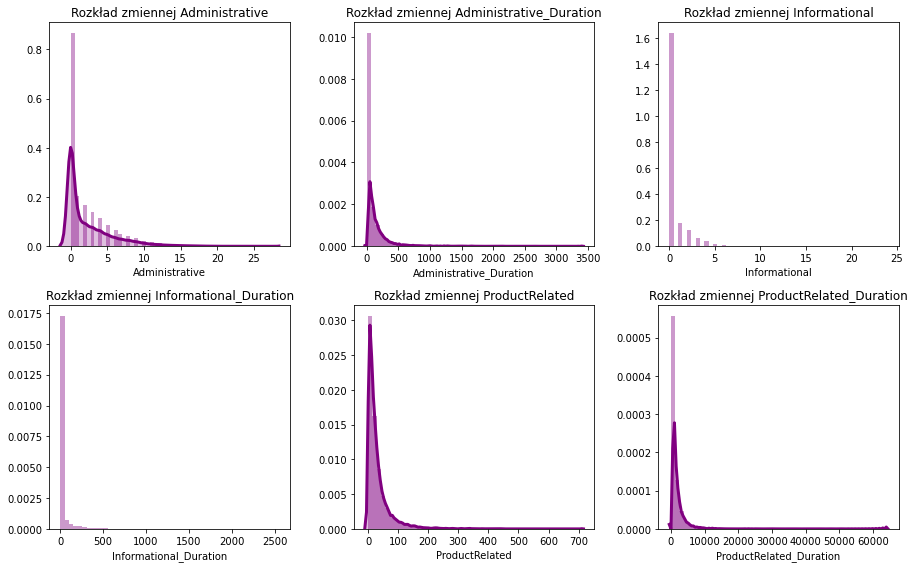

In [28]:
f, axes = plt.subplots(2, 3, figsize=(13, 8))

for i in range(0, len(other_pages_columns)):
    sns.distplot(df[other_pages_columns[i]].dropna(),color="purple", 
                 hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3},
                 ax=axes[i//3, i%3]).set_title('Rozkład zmiennej '+ other_pages_columns[i])

plt.tight_layout();

Jak widać mimo małego zakresu absolutnej większości obserwacji (głównie pojawia się wartość "0"), outliery mocno odbiegające od standardowych wartości robią swoje. Trzeba je mieć na uwadze.

Jak prezentują się miary udostępnione przez *Google Analytics*?

In [31]:
rates = df.columns[6:9]
rates

Index(['BounceRates', 'ExitRates', 'PageValues'], dtype='object')

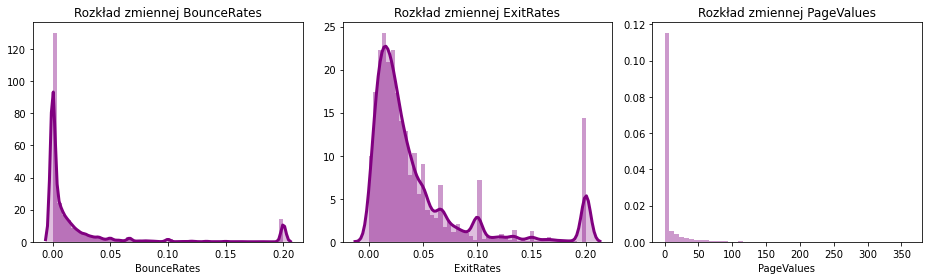

In [32]:
f, axes = plt.subplots(1, 3, figsize=(13, 4))

for i in range(0, len(rates)):
    sns.distplot(df[rates[i]].dropna(),color="purple", 
                 hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3},
                 ax=axes[i%3]).set_title('Rozkład zmiennej '+ rates[i])

plt.tight_layout();

Rzeczywiście oba wskaźniki oscylują wokół paru procent, jednak potrafią dojść nawet do 20%.

Ciekawą kolumną jest *PageValues* - tu niemalże zawsze mamy wartość kilka, lecz skrajne witryny osiągają nawet 250.

Zobaczmy jeszcze wartości dla *SpecialDay*.

In [33]:
print("Zerowych wartości \"Special Day\": ",round(sum(df['SpecialDay'] == 0) / len(df) * 100, 2), "%", sep = "")

Zerowych wartości "Special Day": 89.85%


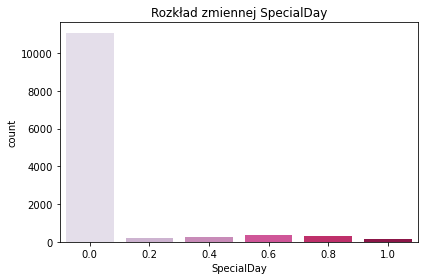

In [35]:
sns.countplot(data=df, x="SpecialDay",
              palette="PuRd").set_title('Rozkład zmiennej SpecialDay')
plt.tight_layout();

Absolutna większość dni zdecydowania nie jest "specjalna" - dlatego na szczególną uwagę zasługują te o wartości niezerowej.

### Rozkłady zmiennych kategorycznych

In [36]:
categorical_colnames = df.columns[df.dtypes == "object"]
categorical_colnames

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')

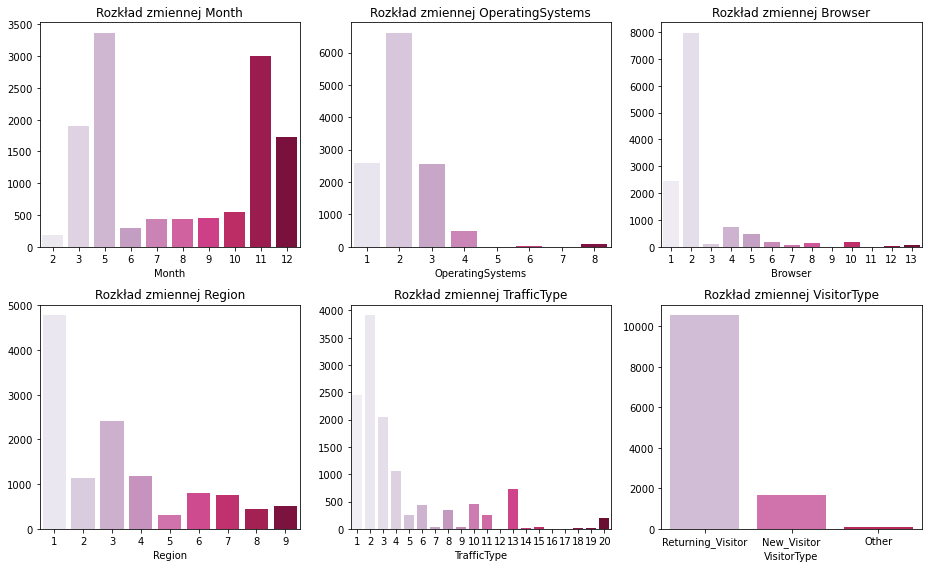

In [38]:
f, axes=plt.subplots(2, 3, figsize=(13, 8))

for i in range(0, len(categorical_colnames)):
    sns.countplot(data=df, x=categorical_colnames[i], 
                  ax=axes[i//3, i%3], palette="PuRd").set_title('Rozkład zmiennej '+ categorical_colnames[i])
for ax in f.axes:
    ax.set_ylabel('')
plt.tight_layout();

Wnioski:

1. Nie ma równomiernego rozkładu miesięcy - nie mówiąc o tym, że nie mamy żadnych danych ze stycznia i kwietnia, przeważają chociażby maj i listopad (po ponad 3000 obserwacji, razem więcej niż 50% wszystkich),
2. Zaiste przeważa drugi system operacyjny, ale jest także dużo 1. i 3. Drobna liczba systemów o identyfikatorach 5-8,
3. Ludzie przeważnie używają 2. przeglądarki, trochę mniej 1., kilkaset osób 4. i 5. i bardzo malutko pozostałych,
4. Przeważa region pierwszy (blisko 40% wszystkich danych), blisko 20% z regionu 3, inne podobnie, z najmniejszą kilku-procentową częstością regionu trzeciego,
5. Mamy 20 typów ruchu po sieci, absolutna większość to pierwsze 3, a z posotałych głównie 4. i 13.,
6. Ponad 4/5 użytkowników powraca na serwis, a nie jest na nim po raz pierwszy - jest jeszcze mała liczba obserwacji *Other* - czy to swego rodzaju *NA*?

In [39]:
(df[['VisitorType']]  == 'Other').sum()

VisitorType    85
dtype: int64

Jest ich dokładnie 85.

Teraz zobaczmy jak wyglądają rozkłady zmiennych binarnych.

In [40]:
binary_colnames = df.columns[df.dtypes == "bool"]
binary_colnames

Index(['Weekend', 'Revenue'], dtype='object')

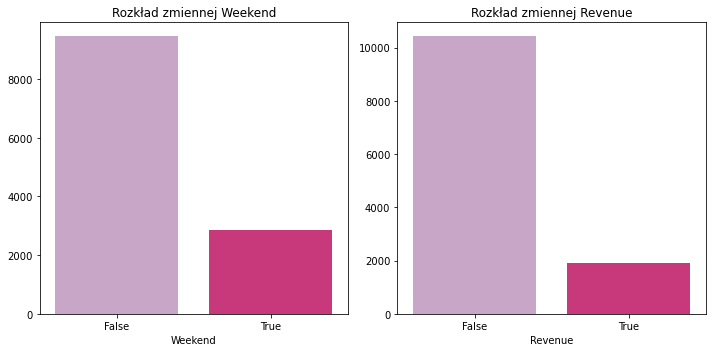

In [43]:
f, axes=plt.subplots(1, 2, figsize=(10, 5))

for i in range(0, len(binary_colnames)):
    sns.countplot(data=df, x=binary_colnames[i], 
                  ax=axes[i%2], palette="PuRd").set_title('Rozkład zmiennej '+ binary_colnames[i])
for ax in f.axes:
    ax.set_ylabel('')
plt.tight_layout();

In [64]:
sum(df['Weekend'] == True)/2, sum(df['Weekend'] == False)/5

(1434.0, 1892.4)

Wnioski:

1. Znacznie więcej jest wejść w tygodniu niż w weekend, nawet jeśli patrzymy na średnią liczbę wejść na jeden dzień,
2. Tylko mały procent osób odwiedzających stronę w końcu decyduje się na kupno.

Obie zależności mogą wynikać z tego, że dużo ludzi przegląda strony internetowe w pracy bez zamiaru kupna, tylko żeby  poszukać informacji.

## Relacje między kolumnami

Na początku wyświetlmy macierz korelacji.

In [83]:
corr = df.corr()
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016767,-0.082305


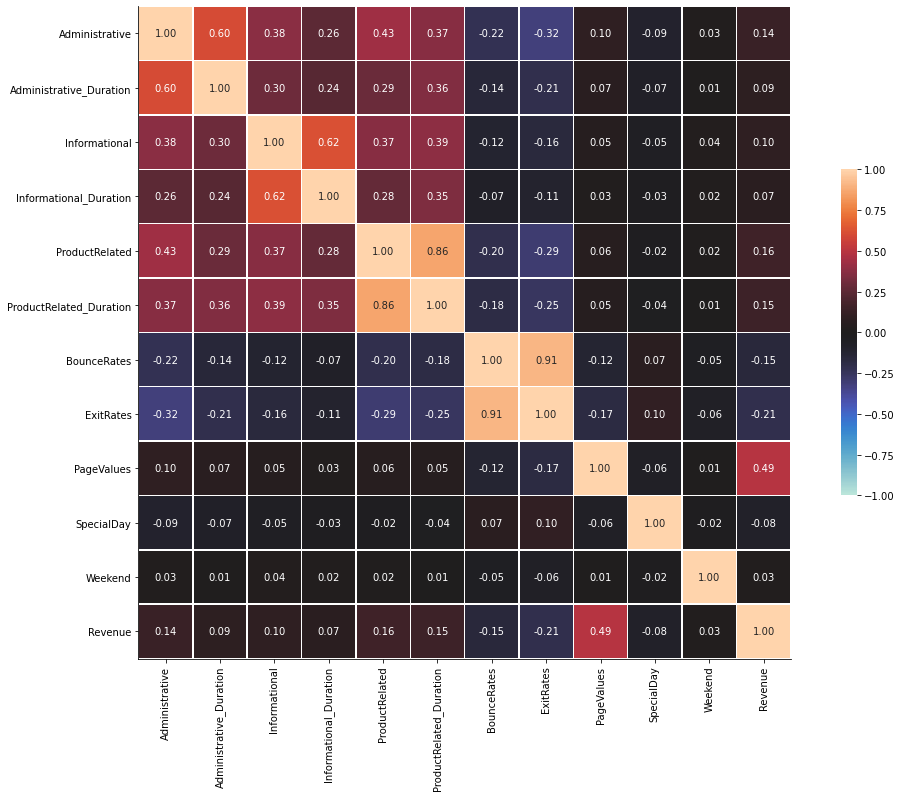

In [77]:
g = sns.heatmap(corr,  vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='icefire')
sns.despine()
g.figure.set_size_inches(18,12)
    
plt.show()

Bez zaskoczeń możemy zaobserwować dużą korelację między liczbą innych stron odwiedzonych przez użytkowników a czasem na nich spędzonych - w innym wypadku byłoby to podejrzane.

Możemy także zaobserwować dużą korelację między ilościami wejść na inne strony i czasie na nich spędzonych niezależnie od kategorii. Okazuje się także, że oba wskaźniki zaproponowane przez *Googla* są do siebie bardzo zbliżone.

Mamy też potwierdzenie definicji *PageValues* - rzeczywiście owy wynik jest związany z informacją czy z tej strony nastąpiła transakcja.

### Zależności między wybranymi zmiennymi

*ExitRates* oraz *BounceRates*

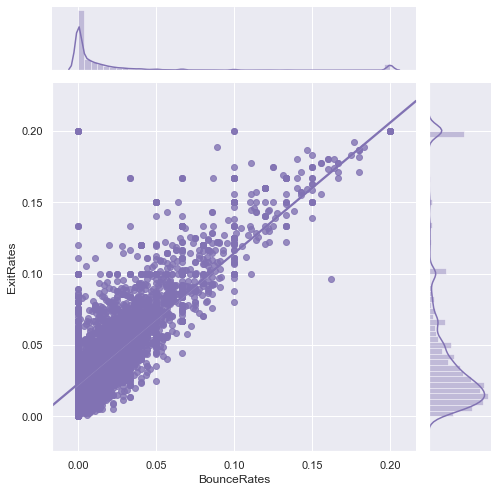

In [104]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("BounceRates", "ExitRates", data=df,
                  kind="reg", truncate=False,
                  color="m",height=7)

Rzeczywiście widać tu silną zależność.

*ProductRelated* oraz *ProductRelated_Duration*

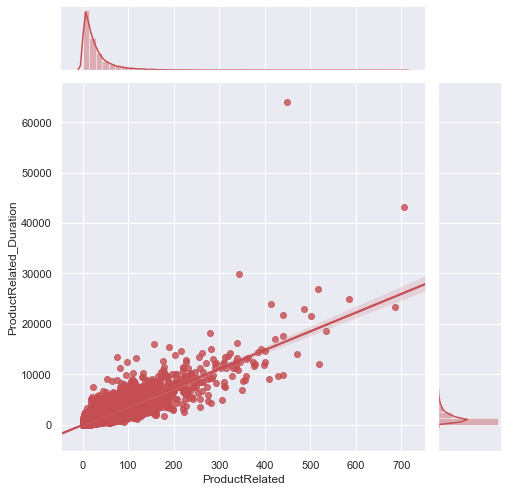

In [108]:
tips = sns.load_dataset("tips")
g = sns.jointplot("ProductRelated", "ProductRelated_Duration", data=df,
                  kind="reg", truncate=False,
                  color="r",height=7)